In [95]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score


In [2]:
data = load_breast_cancer()

In [37]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
X


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [84]:
model_knn = KNeighborsClassifier(n_neighbors = 7)
model_RF = RandomForestClassifier(n_estimators = 25)
model_DT = DecisionTreeClassifier()
model_SVM = svm.SVC()

In [85]:
model_knn.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_DT.fit(X_train, y_train)
model_SVM.fit(X_train, y_train)

c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [86]:
y_pred_knn = model_knn.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_DT = model_DT.predict(X_test)
y_pred_SVM = model_SVM.predict(X_test)

In [87]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_RF = accuracy_score(y_test, y_pred_RF)
acc_DT = accuracy_score(y_test, y_pred_DT)
acc_SVM = accuracy_score(y_test, y_pred_SVM)

f1_knn = f1_score(y_test, y_pred_knn)
f1_RF = f1_score(y_test, y_pred_RF)
f1_DT = f1_score(y_test, y_pred_DT)
f1_SVM = f1_score(y_test, y_pred_SVM)


print(f"Accuracy of the KNN model is {acc_knn*100}")
print(f"Accuracy of the Random Forest model is {acc_RF*100}")
print(f"Accuracy of the Desicion Tree model is {acc_DT*100}")
print(f"Accuracy of the SVM model is {acc_SVM*100}")
print("")
print(f"F1 Score of the KNN model is {f1_knn*100}")
print(f"F1 Score of the Random Forest model is {f1_RF*100}")
print(f"F1 Score of the Desicion Tree model is {f1_DT*100}")
print(f"F1 Score of the SVM model is {f1_SVM*100}")

Accuracy of the KNN model is 95.6140350877193
Accuracy of the Random Forest model is 97.36842105263158
Accuracy of the Desicion Tree model is 93.85964912280701
Accuracy of the SVM model is 94.73684210526315

F1 Score of the KNN model is 96.55172413793103
F1 Score of the Random Forest model is 97.93103448275862
F1 Score of the Desicion Tree model is 95.0354609929078
F1 Score of the SVM model is 95.94594594594594


In [90]:
labels = ["Benign", "Malignant"]
con_knn = confusion_matrix(y_test, y_pred_knn)
con_RF = confusion_matrix(y_test, y_pred_RF)
con_DT = confusion_matrix(y_test, y_pred_DT)
con_SVM = confusion_matrix(y_test, y_pred_SVM)


### KNN

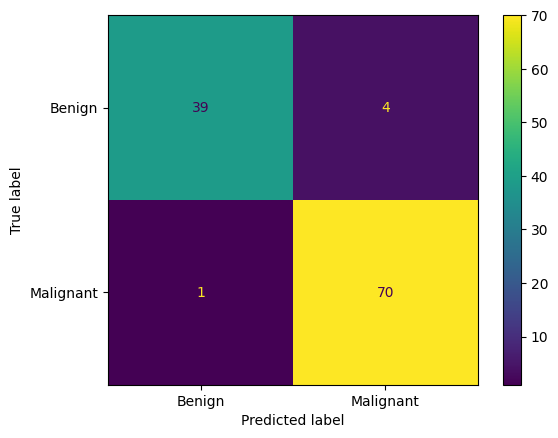

In [91]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix = con_knn, display_labels = labels) 
disp_knn.plot();


### Random Forest

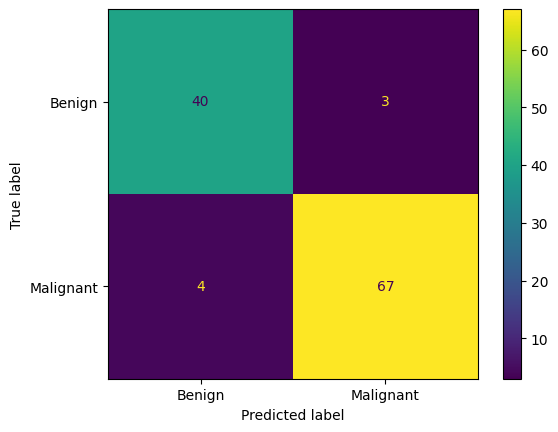

In [92]:
disp_RF = ConfusionMatrixDisplay(confusion_matrix = con_DT, display_labels = labels) 
disp_RF.plot();

### Decision Tree

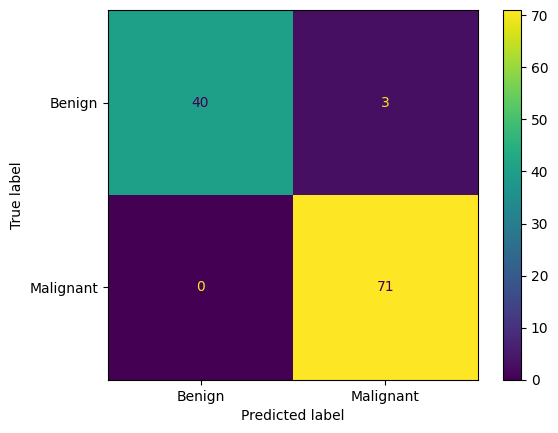

In [93]:
disp_DT = ConfusionMatrixDisplay(confusion_matrix = con_RF, display_labels = labels) 
disp_DT.plot();

### SVM

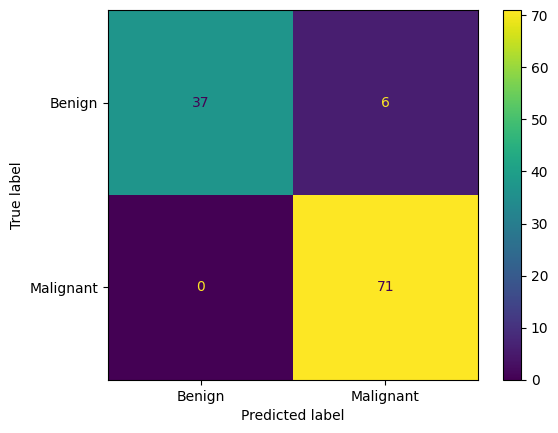

In [94]:
disp_SVM = ConfusionMatrixDisplay(confusion_matrix = con_SVM, display_labels = labels) 
disp_SVM.plot();

In [101]:
VC = VotingClassifier(estimators = [('svm', model_SVM), ("KNeighborsClassifier", model_knn)])
VC.fit(X_train, y_train)
VC_pred = VC.predict(X_test)
acc = accuracy_score(y_test, VC_pred)
acc

c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.9736842105263158